### **Student Performance Indicater**

Life cycle of Machine Learning Project

1. Understanding the problem statement
2. Data Collection
3. Data Checks to perform
4. Exploratory data analysis
5. Data Pre-Processing
6. Model Training
7. Choose best model

### 1)Problem Statement
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and test preparation course

### 2) Data collection
Dataset sorce: - https://www.kaggle.com/datasets/sandeepgauti/student-performance-data

The data consist of 8 column and 1000 rows

### 2.1 Import data and required packages

importing numpy, pandas, matplotlib, seaborn and warnings library

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Models
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


In [70]:
## Import the csv Data as pandas data frame

df = pd.read_csv('data\stud.csv')

In [71]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [72]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [73]:
## checking duplicates
df.duplicated().sum()

0

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [75]:
## checking unique values in each column

df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [76]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight
From the above description of numerical data, all means are very close to eaxh other - between 66 and 69.17;
all standard deviations are also very close - between 14.6 and 15.19
while there is a minimum score of 0 in maths, for writing its higher = 10, and for reading its 17.

## 3.7 exploring data

In [77]:
print("Categories in 'gender' variable: ",end = " ")
print(df['gender'].unique())

Categories in 'gender' variable:  ['female' 'male']


In [78]:
print("Categories in 'race_ethnicity' variable: ",end = " ")
print(df['race_ethnicity'].unique())

df['race_ethnicity'].value_counts()

Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']


race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

In [79]:
print("categories in 'parental level of education' variable : ", end=" ")
print(df['parental_level_of_education'].unique())
df['parental_level_of_education'].value_counts()

categories in 'parental level of education' variable :  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

In [80]:
print ("categories in 'lunch' variable :", end = " ")
print(df['lunch'].unique())
df['lunch'].value_counts()

categories in 'lunch' variable : ['standard' 'free/reduced']


lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [81]:
print("categories in 'test preparation course' variable : ", end= " ")
print(df['test_preparation_course'].unique())
df['test_preparation_course'].value_counts()

categories in 'test preparation course' variable :  ['none' 'completed']


test_preparation_course
none         642
completed    358
Name: count, dtype: int64

In [82]:
# define numerical and categorical columns

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns

print('We have {} numerical features : {}'.format(len(numerical_features),numerical_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features),categorical_features))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']

We have 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### Adding 'total score' and 'avg score' columns

In [83]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['avg_score'] = (df['total_score'])//3

df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72
1,female,group C,some college,standard,completed,69,90,88,247,82
2,female,group B,master's degree,standard,none,90,95,93,278,92
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49
4,male,group C,some college,standard,none,76,78,75,229,76


In [84]:
reading_full = df[df['reading_score']==100]['avg_score'].count()
writing_full = df[df['writing_score']==100]['avg_score'].count()
math_full = df[df['math_score']==100]['avg_score'].count()

print(f"no. of students scored full marks in reading are {reading_full}")
print(f'no. of students scored full marks in writing are {writing_full}')
print(f'no. of students scored full marks in maths are {math_full}')

no. of students scored full marks in reading are 17
no. of students scored full marks in writing are 14
no. of students scored full marks in maths are 7


In [85]:
reading_less_20 = df[df['reading_score']<= 20]['avg_score'].count()
writing_less_20 = df[df['writing_score']<= 20]['avg_score'].count()
math_less_20 = df[df['math_score']<= 20]['avg_score'].count()

print(f'no of students having less than 20 marks in reading are {reading_less_20}')
print(f'no of students having less than 20 marks in writing are {writing_less_20}')
print(f'no of students having less than 20 marks in math are {math_less_20}')

no of students having less than 20 marks in reading are 1
no of students having less than 20 marks in writing are 3
no of students having less than 20 marks in math are 4


### Insights
from above observation, we get that students have worst performance in maths
best performance in reading section

## 4. Exploring Data (Visualization)


4.1 Visualize avg_score distribution to make some conclusions
    
    Histogram
    Kernel Distribution Function
    

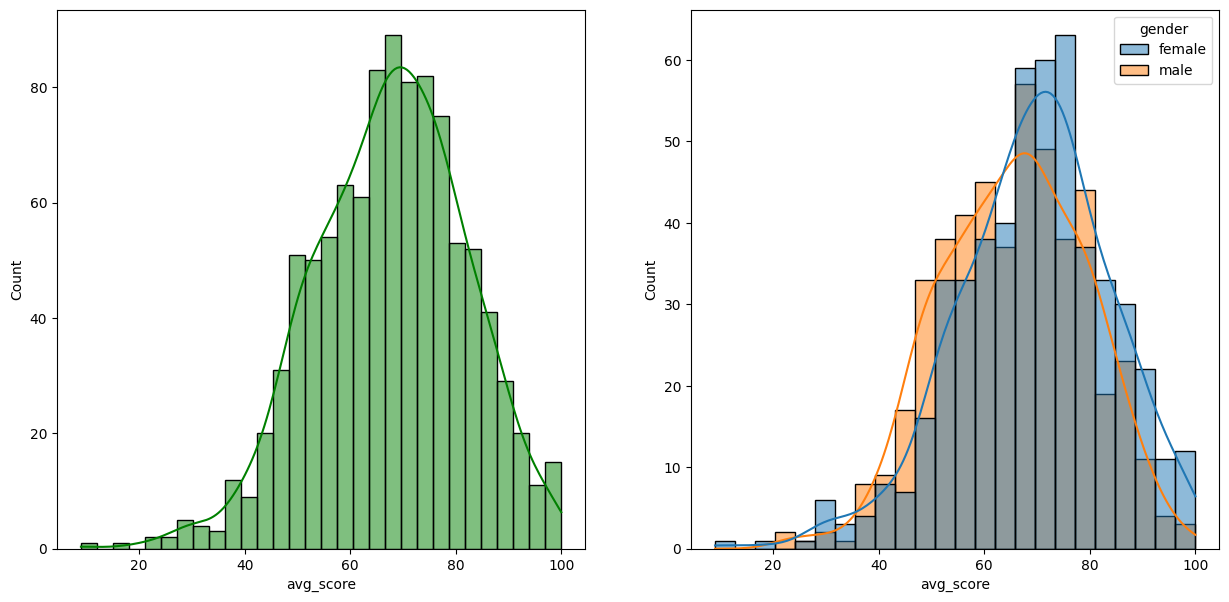

In [86]:
fig, axs = plt.subplots(1,2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='avg_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='avg_score',kde=True,hue='gender')
plt.show()


### Preparing X and Y variables

In [87]:
X = df.drop(columns=['math_score'], axis = 1)

In [88]:
y = df['math_score']

In [89]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,74,218,72
1,female,group C,some college,standard,completed,90,88,247,82
2,female,group B,master's degree,standard,none,95,93,278,92
3,male,group A,associate's degree,free/reduced,none,57,44,148,49
4,male,group C,some college,standard,none,78,75,229,76


In [90]:
# create column transformer with 3 type of transformers

num_features = X.select_dtypes(exclude= "object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
ohe_transformer = OneHotEncoder()

preprocesssor = ColumnTransformer(
    [
        ("OneHotEncoder", ohe_transformer,cat_features),
        ("StandardScaler", numeric_transformer,num_features),
    ]
)

In [91]:
X = preprocesssor.fit_transform(X)

In [92]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  0.39149181,
         0.34357423,  0.31951031],
       [ 1.        ,  0.        ,  0.        , ...,  1.31326868,
         1.0219275 ,  1.02095996],
       [ 1.        ,  0.        ,  0.        , ...,  1.64247471,
         1.74706375,  1.72240961],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.20107904,
        -0.19443008, -0.17150444],
       [ 1.        ,  0.        ,  0.        , ...,  0.58901542,
         0.46053169,  0.45980024],
       [ 1.        ,  0.        ,  0.        , ...,  1.18158627,
         1.06871048,  1.09110493]])

In [93]:
X.shape

(1000, 21)

In [94]:
## Separate dataset into train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
X_train.shape, X_test.shape

((800, 21), (200, 21))

### Create an Evaluate Function to give all metrics after model training

In [95]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [99]:
# from sklearn.linear_model import LinearRegression, Lasso, Ridge
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
# from xgboost import XGBRegressor
# from catboost import CatBoostRegressor
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np

# Define evaluate_model function
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "Random Forest Reg": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(verbosity=0),
    "Catboosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoostRegressor": AdaBoostRegressor()
}

# Lists to store model names and R2 scores
model_list = []
r2_list = []


# Iterate over models
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate train and test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(name)
    model_list.append(name)

    print('Model performance for training set')
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- R2 score: {:.4f}".format(model_train_r2))
    print("______________________________________________")

    print("Model performance for test set")
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- R2 score: {:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)
    print('=' * 51)
    print('\n')


Linear Regression
Model performance for training set
- Mean Absolute Error: 0.0000
- Mean Squared Error: 0.0000
- Root Mean Squared Error: 0.0000
- R2 score: 1.0000
______________________________________________
Model performance for test set
- Mean Absolute Error: 0.0000
- Mean Squared Error: 0.0000
- Root Mean Squared Error: 0.0000
- R2 score: 1.0000


Lasso
Model performance for training set
- Mean Absolute Error: 3.7434
- Mean Squared Error: 22.4462
- Root Mean Squared Error: 4.7377
- R2 score: 0.9004
______________________________________________
Model performance for test set
- Mean Absolute Error: 3.7582
- Mean Squared Error: 22.2513
- Root Mean Squared Error: 4.7171
- R2 score: 0.9086


Ridge
Model performance for training set
- Mean Absolute Error: 0.4004
- Mean Squared Error: 0.2385
- Root Mean Squared Error: 0.4883
- R2 score: 0.9989
______________________________________________
Model performance for test set
- Mean Absolute Error: 0.3912
- Mean Squared Error: 0.2344
- Root

Random Forest Reg
Model performance for training set
- Mean Absolute Error: 0.8327
- Mean Squared Error: 1.1698
- Root Mean Squared Error: 1.0816
- R2 score: 0.9948
______________________________________________
Model performance for test set
- Mean Absolute Error: 2.1786
- Mean Squared Error: 8.8265
- Root Mean Squared Error: 2.9709
- R2 score: 0.9637


XGBRegressor
Model performance for training set
- Mean Absolute Error: 0.0829
- Mean Squared Error: 0.0126
- Root Mean Squared Error: 0.1121
- R2 score: 0.9999
______________________________________________
Model performance for test set
- Mean Absolute Error: 1.7552
- Mean Squared Error: 5.5721
- Root Mean Squared Error: 2.3605
- R2 score: 0.9771


Catboosting Regressor
Model performance for training set
- Mean Absolute Error: 0.7717
- Mean Squared Error: 0.8939
- Root Mean Squared Error: 0.9454
- R2 score: 0.9960
______________________________________________
Model performance for test set
- Mean Absolute Error: 1.9633
- Mean Squared

### Results

In [102]:
data = list(zip(model_list, r2_list))
df = pd.DataFrame(data, columns=['Model Name', 'R2_score'])

df_sorted = df.sort_values(by='R2_score', ascending=False)
df_sorted


,Model Name,R2_score
0,Linear Regression,1.000000
2,Ridge,0.999037
6,XGBRegressor,0.977101
7,Catboosting Regressor,0.967394
5,Random Forest Reg,0.963728
4,DecisionTree,0.942241
8,AdaBoostRegressor,0.923372
1,Lasso,0.908558
3,K-Neighbors Regressor,0.893867


In [107]:
xgb_mod = XGBRegressor()
xgb_mod = xgb_mod.fit(X_train,y_train)
y_pred = xgb_mod.predict(X_test)
score = r2_score(y_test, y_pred)*100
print("Accuracy of the model is : %.2f"%score)

Accuracy of the model is : 97.71


#### Plot y pred, y test

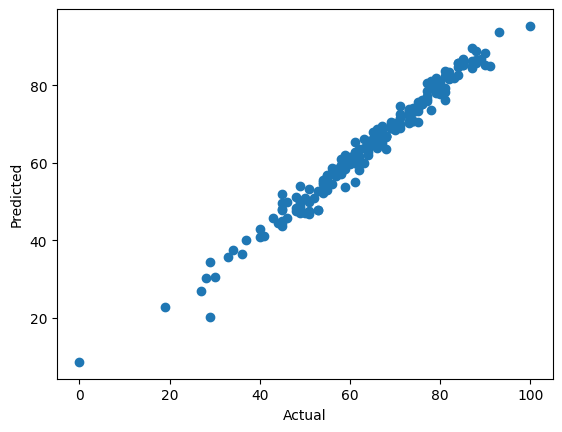

In [109]:
plt.scatter(y_test, y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

<Axes: xlabel='math_score'>

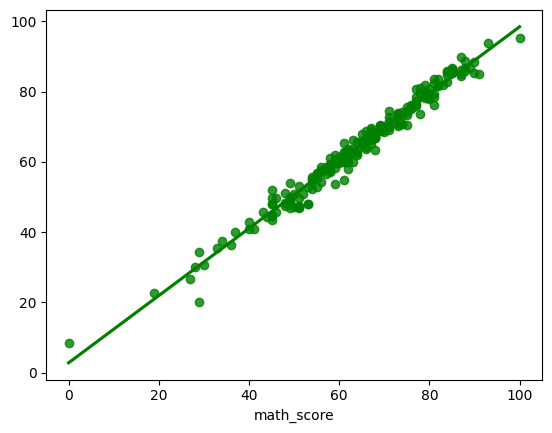

In [111]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='green')

##### Difference between actual and predicted values

In [112]:
pred_df = pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,84.985962,6.014038
737,53,52.825253,0.174747
740,80,79.658371,0.341629
660,74,70.756973,3.243027
411,84,85.663795,-1.663795
...,...,...,...
408,52,51.001301,0.998699
332,62,63.690971,-1.690971
208,74,70.854652,3.145348
613,65,65.438904,-0.438904
